In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import pandas as pd

dataset = pd.read_csv(r'/CoronaTweetsSentimentAnalysis.csv')
print(dataset)

      UserName  ScreenName                Location     TweetAt  \
0            1       44954             Seattle, WA  02-03-2020   
1            2       44956             Chicagoland  02-03-2020   
2            3       44959                     NaN  03-03-2020   
3            4       44963  Boksburg, South Africa  04-03-2020   
4            5       44967          Washington, DC  04-03-2020   
...        ...         ...                     ...         ...   
1983      1984       48737       Paraparaumu Beach  16-03-2020   
1984      1985       48743        Cincinnati, Ohio  16-03-2020   
1985      1986       48745         Washington D.C.  16-03-2020   
1986      1987       48746               Israel ??  16-03-2020   
1987      1988       48747          Farmington, NM  16-03-2020   

                                          OriginalTweet Sentiment  
0     When I couldn't find hand sanitizer at Fred Me...  Positive  
1     #Panic buying hits #NewYork City as anxious sh...  Negative  
2  

In [ ]:
dataset.shape

(1988, 6)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       1988 non-null   int64 
 1   ScreenName     1988 non-null   int64 
 2   Location       1536 non-null   object
 3   TweetAt        1988 non-null   object
 4   OriginalTweet  1988 non-null   object
 5   Sentiment      1988 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.3+ KB


In [ ]:
dataset['Sentiment'].value_counts()

Negative    1041
Positive     947
Name: Sentiment, dtype: int64

In [ ]:
target_category = dataset['Sentiment'].unique()
print(target_category)

['Positive' 'Negative']


In [ ]:
dataset['SentimentId'] = dataset['Sentiment'].factorize()[0]
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,SentimentId
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,0
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,1
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive,0


In [ ]:
target = dataset[['Sentiment', 'SentimentId']].drop_duplicates().sort_values('SentimentId')
target

,Sentiment,SentimentId
0,Positive,0
1,Negative,1


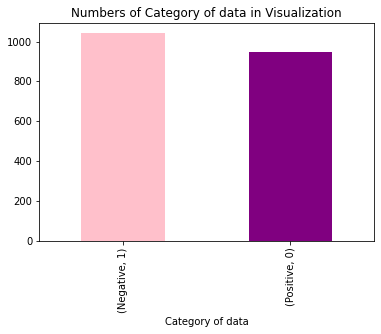

In [ ]:
dataset.groupby('Sentiment').SentimentId.value_counts().plot(kind = "bar", color = ["pink", "purple"])
plt.xlabel("Category of data")
plt.title("Numbers of Category of data in Visualization")
plt.show()

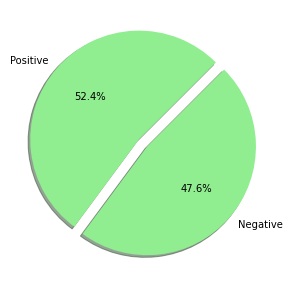

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["lightgreen"]
Negative = dataset[dataset['SentimentId'] == 0 ]
Positive = dataset[dataset['SentimentId'] == 1 ]
count = [Positive['SentimentId'].count(), Negative['SentimentId'].count()]
pie = plt.pie(count, labels = ['Positive', 'Negative'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05))

Positive words:


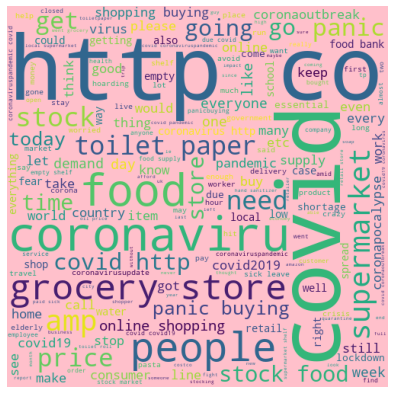

Negative words:


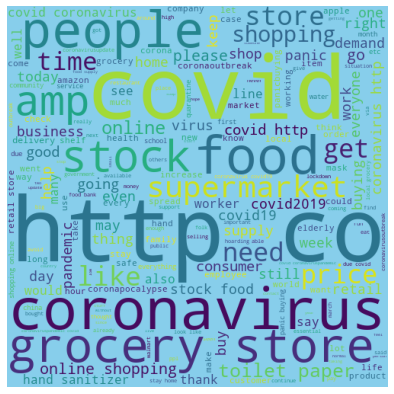

In [58]:
stop = set(stopwords.words('english'))

Positive = dataset[dataset['SentimentId'] == 1]

Positive = Positive['OriginalTweet']

Negative = dataset[dataset['SentimentId'] == 0]

Negative = Negative['OriginalTweet']

def wordcloud_draw(dataset, color = 'pink'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
                             if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop,
                          background_color = color,
                          width = 500, height = 500).generate(cleaned_word)
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("Positive words:")

wordcloud_draw(Positive, 'pink')

print("Negative words:")

wordcloud_draw(Negative, 'skyblue')


In [ ]:
text = dataset["OriginalTweet"]
text.head(10)

0    When I couldn't find hand sanitizer at Fred Me...
1    #Panic buying hits #NewYork City as anxious sh...
2    Voting in the age of #coronavirus = hand sanit...
3    Best quality couches at unbelievably low price...
4    While we were busy watching election returns a...
5    That's about a week from now. A bit optimistic...
6    #CoronaVirus #COVID_19 People are starting to ...
7    Alright yall I hope our Melanin prevails but ...
8    When your usual grocery shopping @woolworths t...
9    Coronavirus panic spreads: Costco is pulling f...
Name: OriginalTweet, dtype: object

In [ ]:
Sentiment = dataset['Sentiment']
Sentiment.head(10)

0    Positive
1    Negative
2    Positive
3    Positive
4    Positive
5    Positive
6    Negative
7    Positive
8    Negative
9    Negative
Name: Sentiment, dtype: object

In [ ]:
def remove_tags(OriginalTweet):
  remove = re.compile(r'')
  return re.sub(remove, '', OriginalTweet)
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(remove_tags)

In [ ]:
def special_char(OriginalTweet):
  reviews = ''
  for x in OriginalTweet:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(special_char)

In [ ]:
def convert_lower(OriginalTweet):
   return OriginalTweet.lower()
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(convert_lower)
dataset['OriginalTweet'][1]

' panic buying hits  newyork city as anxious shoppers stock up on food amp medical supplies after  healthcare worker in her 30s becomes  bigapple 1st confirmed  coronavirus patient or a  bloomberg staged event       https   t co iasiregpc4       qanon  qanon2018  qanon2020     election2020  cdc https   t co 29iszoewxu'

In [ ]:
def remove_stopwords(OriginalTweet):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(OriginalTweet)
  return [x for x in words if x not in stop_words]
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(remove_stopwords)
dataset['OriginalTweet'][1]

['panic',
 'buying',
 'hits',
 'newyork',
 'city',
 'anxious',
 'shoppers',
 'stock',
 'food',
 'amp',
 'medical',
 'supplies',
 'healthcare',
 'worker',
 '30s',
 'becomes',
 'bigapple',
 '1st',
 'confirmed',
 'coronavirus',
 'patient',
 'bloomberg',
 'staged',
 'event',
 'https',
 'co',
 'iasiregpc4',
 'qanon',
 'qanon2018',
 'qanon2020',
 'election2020',
 'cdc',
 'https',
 'co',
 '29iszoewxu']

In [ ]:
def lemmatize_word(OriginalTweet):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in OriginalTweet])
dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(lemmatize_word)
dataset['OriginalTweet'][1]

'panic buying hit newyork city anxious shopper stock food amp medical supply healthcare worker 30 becomes bigapple 1st confirmed coronavirus patient bloomberg staged event http co iasiregpc4 qanon qanon2018 qanon2020 election2020 cdc http co 29iszoewxu'

In [ ]:
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,SentimentId
0,1,44954,"Seattle, WA",02-03-2020,find hand sanitizer fred meyer turned amazon 1...,Positive,0
1,2,44956,Chicagoland,02-03-2020,panic buying hit newyork city anxious shopper ...,Negative,1
2,3,44959,NaN,03-03-2020,voting age coronavirus hand sanitizer supertue...,Positive,0
3,4,44963,"Boksburg, South Africa",04-03-2020,best quality couch unbelievably low price avai...,Positive,0
4,5,44967,"Washington, DC",04-03-2020,busy watching election return bracing covid 19...,Positive,0
...,...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,k piti new world busy staff say way since covi...,Positive,0
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,even though law library closed subscriber acce...,Positive,0
1985,1986,48745,Washington D.C.,16-03-2020,ricepolitics mdcounties craig call general ass...,Negative,1
1986,1987,48746,Israel ??,16-03-2020,meanwhile supermarket israel people dance sing...,Positive,0


In [ ]:
x = dataset['OriginalTweet']
y = dataset['SentimentId']

In [ ]:
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.SentimentId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.OriginalTweet).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1988, 5000)
y.shape =  (1988,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1391
597


In [ ]:
perform_list = [ ]

In [ ]:
def run_model(model_name, est_c, est_pnlty):

  mdl=''

  if model_name == 'Logistic Regression':
    mdl = LogisticRegression()

  elif model_name == 'Random Forest':
    mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

  elif model_name == 'Multinomial Naive Bayes':
    mdl = MultinomialNB(alpha=1.0,fit_prior=True)

  elif model_name == 'Support Vector Classifer':
    mdl = SVC()

  elif model_name == 'Decision Tree Classifier':
    mdl = DecisionTreeClassifier()

  elif model_name == 'K Nearest Neighbour':
    mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)

  elif model_name == 'Gaussian Naive Bayes':
    mdl = GaussianNB()

  oneVsRest = OneVsRestClassifier(mdl)

  oneVsRest.fit(x_train, y_train)

  y_pred = oneVsRest.predict(x_test)

  # Performance metrics

  accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

  # Get precision, recall, f1 scores

  precision, recall, f1score, support = score(y_test, y_pred, average='micro')

  print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')

  print(f'Precision : {precision}')

  print(f'Recall : {recall}')

  print(f'F1-score : {f1score}')

  # Add performance parameters to list

  perform_list.append(dict([

  ('Model', model_name),

  ('Test Accuracy', round(accuracy, 2)),

  ('Precision', round(precision, 2)),

  ('Recall', round(recall, 2)),

  ('F1', round(f1score, 2))

  ]))

In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 62.81
Precision : 0.628140703517588
Recall : 0.628140703517588
F1-score : 0.628140703517588


In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 64.32
Precision : 0.6432160804020101
Recall : 0.6432160804020101
F1-score : 0.6432160804020101


In [ ]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 61.98
Precision : 0.6197654941373534
Recall : 0.6197654941373534
F1-score : 0.6197654941373534


In [ ]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 61.64
Precision : 0.6164154103852596
Recall : 0.6164154103852596
F1-score : 0.6164154103852596


In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 54.94
Precision : 0.5494137353433836
Recall : 0.5494137353433836
F1-score : 0.5494137353433836


In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 54.27
Precision : 0.542713567839196
Recall : 0.542713567839196
F1-score : 0.542713567839196


In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 57.79
Precision : 0.5778894472361809
Recall : 0.5778894472361809
F1-score : 0.5778894472361809


In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,62.81,0.63,0.63,0.63
1,Random Forest,64.32,0.64,0.64,0.64
2,Multinomial Naive Bayes,61.98,0.62,0.62,0.62
3,Support Vector Classifer,61.64,0.62,0.62,0.62
4,Decision Tree Classifier,54.94,0.55,0.55,0.55
5,K Nearest Neighbour,54.27,0.54,0.54,0.54
6,Gaussian Naive Bayes,57.79,0.58,0.58,0.58


In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random Forest")

The best accuracy of model is 64.32 from Random Forest


In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [54]:
y_pred1 = cv.transform(["When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices."])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Positive"
elif yy == [1]:
  result = "Negative"
print(result)

Positive


In [ ]:
y_pred1 = cv.transform(["#CoronaVirus #COVID_19 People are starting to become frightened and to do #PanicShopping. Many shelves, meanwhile, turn empty as #goods are sold."])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Positive"
elif yy == [1]:
  result = "Negative"
print(result)

Negative
